In [18]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import datetime
import matplotlib.pyplot as plt

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='

In [3]:
tickers = ['BHP']

In [7]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker
    
    req = Request(url=url, headers={'user-agent': 'student'})
    response = urlopen(req)
    
    html = BeautifulSoup(response, features='html.parser')
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table


In [8]:
news_tables

{'BHP': <table border="0" cellpadding="1" cellspacing="0" class="fullview-news-outer" id="news-table" width="100%">
 <tr><td align="right" width="130">Oct-07-22 02:06AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/bhp-plan-keep-coal-mine-012352326.html" target="_blank">BHPs Plan to Keep Coal Mine Open for 93 Years Delusional</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Bloomberg</span></div></div></td></tr>
 <tr><td align="right" width="130">Oct-05-22 02:45AM</td><td align="left"><div class="news-link-container"><div class="news-link-left"><a class="tab-link-news" href="https://finance.yahoo.com/news/1-pavilion-energy-mitsui-o-064533559.html" target="_blank">UPDATE 1-Pavilion Energy, Mitsui O.S.K to launch LNG bunker vessel in Q1 2023</a></div><div class="news-link-right"><span style="color:#aa6dc0;font-size:9px"> Reuters</span></div></div></td></tr>
 <

In [9]:
parsed_data = []
for ticker, news_table in news_tables.items():
    for row in news_table.findAll('tr'): #to look for date and time data
        
        title = row.a.text
        date_data = row.td.text.split(' ')
        
        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]
            
        parsed_data.append([ticker, date, time, title])
    

In [10]:
parsed_data

[['BHP',
  'Oct-07-22',
  '02:06AM',
  'BHPs Plan to Keep Coal Mine Open for 93 Years Delusional'],
 ['BHP',
  'Oct-05-22',
  '02:45AM',
  'UPDATE 1-Pavilion Energy, Mitsui O.S.K to launch LNG bunker vessel in Q1 2023'],
 ['BHP',
  'Oct-04-22',
  '10:37PM',
  'Should You Be Adding BHP Group (ASX:BHP) To Your Watchlist Today?'],
 ['BHP',
  'Oct-04-22',
  '06:17AM',
  "World's Largest Miner Aims To Boost Its Green Credentials - Read How"],
 ['BHP',
  'Oct-04-22',
  '12:14AM',
  'BHP to receive 3 more LNG-fuelled bulk carriers in next 6-9 mths - exec'],
 ['BHP',
  'Oct-03-22',
  '04:03AM',
  'BHP lifts steel consumption forecast on surging demand from renewable power farms'],
 ['BHP', 'Sep-28-22', '12:59PM', '7 Best Precious Metals Stocks to Buy Now'],
 ['BHP',
  'Sep-28-22',
  '08:35AM',
  'BHP Sees Chile Uncertainties Easing in Investment Climate Boost'],
 ['BHP',
  'Sep-27-22',
  '12:40PM',
  '10 Best Materials Stocks to Buy After Feds Latest Rate Hike'],
 ['BHP',
  'Sep-26-22',
  '02:

In [11]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])

In [12]:
df

,ticker,date,time,title
0,BHP,Oct-07-22,02:06AM,BHPs Plan to Keep Coal Mine Open for 93 Years ...
1,BHP,Oct-05-22,02:45AM,"UPDATE 1-Pavilion Energy, Mitsui O.S.K to laun..."
2,BHP,Oct-04-22,10:37PM,Should You Be Adding BHP Group (ASX:BHP) To Yo...
3,BHP,Oct-04-22,06:17AM,World's Largest Miner Aims To Boost Its Green ...
4,BHP,Oct-04-22,12:14AM,BHP to receive 3 more LNG-fuelled bulk carrier...
...,...,...,...,...
95,BHP,Jun-14-22,08:35AM,"Samarco, creditors to discuss restructuring pr..."
96,BHP,Jun-13-22,01:34PM,UPDATE 2-BHP open to potash partner but plans ...
97,BHP,Jun-13-22,12:34PM,Canada to invest up to C$100 million in low-em...
98,BHP,Jun-13-22,12:34PM,BHP open to potash partner but plans to enter ...


In [15]:
vader = SentimentIntensityAnalyzer()

In [17]:
f = lambda title: vader.polarity_scores(title)['compound']

In [19]:
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [20]:
df

,ticker,date,time,title,compound
0,BHP,2022-10-07,02:06AM,BHPs Plan to Keep Coal Mine Open for 93 Years ...,0.0000
1,BHP,2022-10-05,02:45AM,"UPDATE 1-Pavilion Energy, Mitsui O.S.K to laun...",0.2732
2,BHP,2022-10-04,10:37PM,Should You Be Adding BHP Group (ASX:BHP) To Yo...,0.0000
3,BHP,2022-10-04,06:17AM,World's Largest Miner Aims To Boost Its Green ...,0.4019
4,BHP,2022-10-04,12:14AM,BHP to receive 3 more LNG-fuelled bulk carrier...,0.0000
...,...,...,...,...,...
95,BHP,2022-06-14,08:35AM,"Samarco, creditors to discuss restructuring pr...",0.0000
96,BHP,2022-06-13,01:34PM,UPDATE 2-BHP open to potash partner but plans ...,-0.3612
97,BHP,2022-06-13,12:34PM,Canada to invest up to C$100 million in low-em...,0.0000
98,BHP,2022-06-13,12:34PM,BHP open to potash partner but plans to enter ...,-0.3612


In [37]:
df_mean = df.groupby(['ticker', 'date']).mean()
df_mean = df_mean.unstack()

In [38]:
df_mean

compound                                                         \
date   2022-06-12 2022-06-13 2022-06-14 2022-06-15 2022-06-16 2022-06-17   
ticker                                                                     
BHP       -0.2732    -0.2408    -0.3062        0.0    0.25445     0.2732   

                                                    ...                        \
date   2022-06-20 2022-06-22 2022-06-25 2022-06-28  ... 2022-09-22 2022-09-23   
ticker                                              ...                         
BHP      0.025733        0.0        0.0   0.113333  ...    0.10115     0.5292   

                                                                          \
date   2022-09-25 2022-09-26 2022-09-27 2022-09-28 2022-10-03 2022-10-04   
ticker                                                                     
BHP           0.0        0.0     0.6369     0.5771     -0.128   0.133967   

                              
date   2022-10-05 2022-10-07  
ticker                        
BHP        0.2732        0.0  

[1 rows x 54 columns]

In [39]:
df_mean = df_mean.xs('compound', axis="columns").transpose()

In [42]:
df_mean.head()

ticker,BHP
date,
2022-06-12,-0.27320
2022-06-13,-0.24080
2022-06-14,-0.30620
2022-06-15,0.00000
2022-06-16,0.25445


In [43]:
df_mean.tail()

ticker,BHP
date,
2022-09-28,0.577100
2022-10-03,-0.128000
2022-10-04,0.133967
2022-10-05,0.273200
2022-10-07,0.000000


<Figure size 1008x720 with 0 Axes>

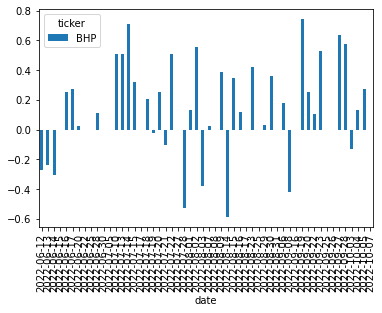

In [41]:
plt.figure(figsize=(14,10))
df_mean.plot(kind='bar')
plt.show()